<a href="https://colab.research.google.com/github/zhany9974-sys/-README.md-/blob/main/copy_of_welcome_to_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# ==========================================
# PHASE 0: Load Data (Mock Data Generated Here)
# ==========================================
# In your real project, replace this block with: df = pd.read_csv('data.csv')
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'North', 'South'],
    'Occupants': [2, 4, 1, 5, 3, 2, 4, 6, 3, 2],
    'Consumption_kWh': [120, 350, 80, 450, 200, np.nan, 400, 1000, 250, 150], # Note: 1000 is an outlier, NaN included
    'Cost_RM': [50, 140, 35, 180, 85, 70, 160, 400, 110, 65]
}
df = pd.DataFrame(data)

print("--- Raw Data Head ---")
print(df.head(), "\n")

# ==========================================
# TASK 1: Data Cleaning Process
# ==========================================
print("--- executing Task 1: Cleaning ---")

# 1. Handle Missing Values (Interpolation)
# We use linear interpolation to fill NaN values based on surrounding data
df['Consumption_kWh'] = df['Consumption_kWh'].interpolate(method='linear')

# 2. Detect and Handle Outliers (IQR Method)
# We apply this to Consumption_kWh as requested
Q1 = df['Consumption_kWh'].quantile(0.25)
Q3 = df['Consumption_kWh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['Consumption_kWh'] < lower_bound) | (df['Consumption_kWh'] > upper_bound)
print(f"Outliers detected: {outliers.sum()}")

# Replace outliers with the Median (Robust measure)
df.loc[outliers, 'Consumption_kWh'] = df['Consumption_kWh'].median()

# Re-calculate Cost if necessary (assuming cost is linear to consumption)
# For this example, we leave Cost_RM as is, or you could apply similar cleaning to Cost_RM.

print("Data cleaning complete.\n")

# ==========================================
# TASK 2: Descriptive Data Analysis
# ==========================================
print("--- Executing Task 2: Analysis ---")

# 1. Compute summary statistics by Region
# We focus on Mean (average), Median (middle value), and Std (variability)
summary_stats = df.groupby('Region')[['Consumption_kWh', 'Cost_RM']].agg(['mean', 'median', 'std'])

print("1. Summary Statistics by Region:")
print(summary_stats)
print("\n")

# 2. Analyse relationship between Consumption and Occupants
# We use the Pearson correlation coefficient
correlation_matrix = df[['Consumption_kWh', 'Occupants']].corr()
corr_value = correlation_matrix.loc['Consumption_kWh', 'Occupants']

print("2. Correlation Analysis:")
print(correlation_matrix)
print(f"\nCorrelation Coefficient: {corr_value:.4f}")

# 3. Comment on patterns (Automated interpretation)
print("\n3. Observation/Comment:")
if corr_value > 0.7:
    print("-> There is a STRONG positive relationship. More occupants significantly increase consumption.")
elif 0.3 < corr_value <= 0.7:
    print("-> There is a MODERATE positive relationship.")
elif -0.3 <= corr_value <= 0.3:
    print("-> There is a WEAK or negligible relationship.")
else:
    print("-> There is a negative relationship (unexpected for this data type).")

--- Raw Data Head ---
  Region  Occupants  Consumption_kWh  Cost_RM
0  North          2            120.0       50
1  North          4            350.0      140
2  South          1             80.0       35
3  South          5            450.0      180
4   East          3            200.0       85 

--- executing Task 1: Cleaning ---
Outliers detected: 1
Data cleaning complete.

--- Executing Task 2: Analysis ---
1. Summary Statistics by Region:
       Consumption_kWh                        Cost_RM                   
                  mean median         std        mean median         std
Region                                                                  
East        250.000000  250.0   70.710678   77.500000   77.5   10.606602
North       240.000000  250.0  115.325626  100.000000  110.0   45.825757
South       226.666667  150.0  196.553640   93.333333   65.0   76.539750
West        337.500000  337.5   88.388348  280.000000  280.0  169.705627


2. Correlation Analysis:
             

/tmp/ipython-input-2756391449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_stats.index, y=summary_stats[('Consumption_kWh', 'mean')], palette='viridis')


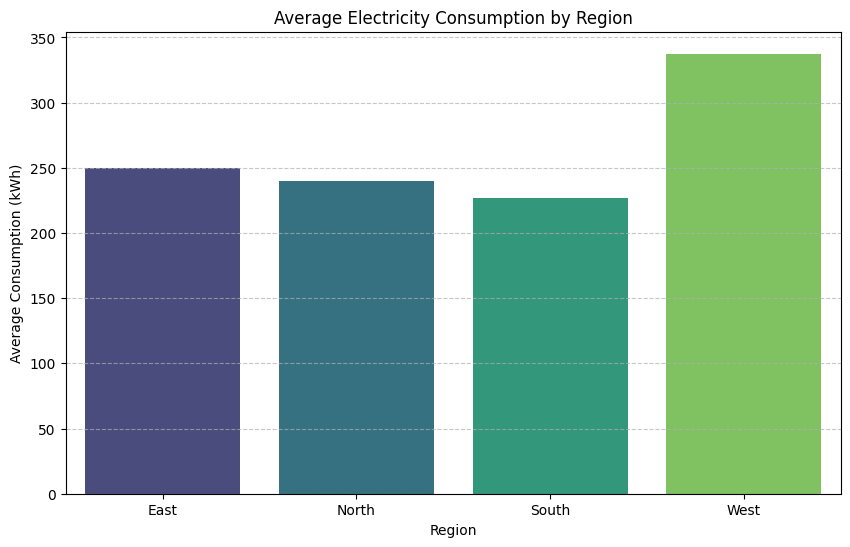

/tmp/ipython-input-2756391449.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_stats.index, y=summary_stats[('Cost_RM', 'mean')], palette='magma')


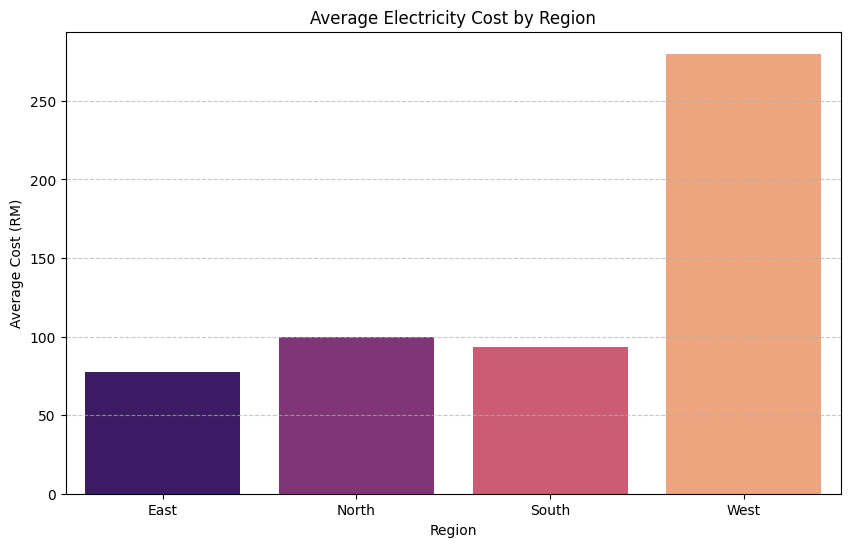

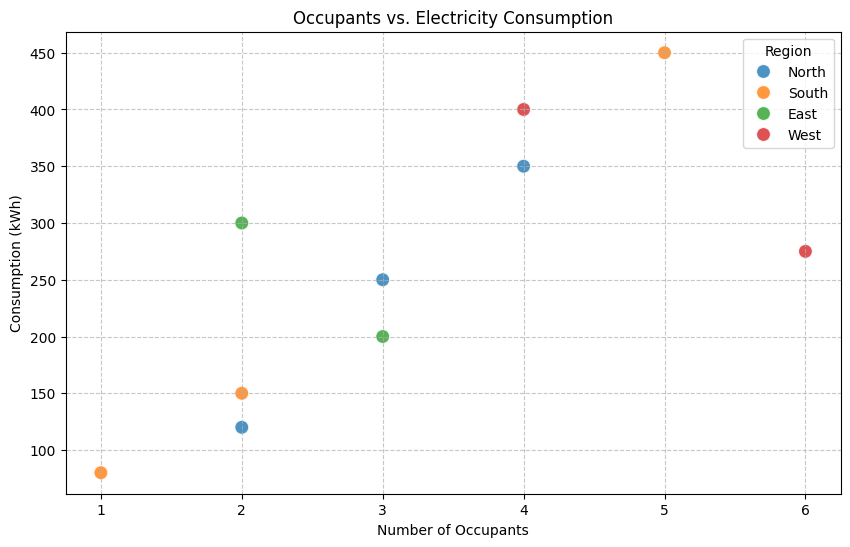

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart for Average Electricity Consumption by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_stats.index, y=summary_stats[('Consumption_kWh', 'mean')], palette='viridis')
plt.title('Average Electricity Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Average Consumption (kWh)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# 2. Bar chart for Average Cost by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_stats.index, y=summary_stats[('Cost_RM', 'mean')], palette='magma')
plt.title('Average Electricity Cost by Region')
plt.xlabel('Region')
plt.ylabel('Average Cost (RM)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# 3. Scatter plot for Occupants vs. Electricity Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Occupants', y='Consumption_kWh', data=df, hue='Region', s=100, alpha=0.8)
plt.title('Occupants vs. Electricity Consumption')
plt.xlabel('Number of Occupants')
plt.ylabel('Consumption (kWh)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Region')
plt.show()